## Random Forest

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Reading a csv
song_data = pd.read_csv('spotify_song.csv')

In [3]:
# display header
song_data.head()

,Unnamed: 0,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,6/14/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),12/13/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),7/5/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,7/19/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),3/5/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
song_data.shape

(32833, 24)

In [5]:
#DataFrame information
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                32833 non-null  int64  
 1   track_id                  32833 non-null  object 
 2   track_name                32828 non-null  object 
 3   track_artist              32828 non-null  object 
 4   track_popularity          32833 non-null  int64  
 5   track_album_id            32833 non-null  object 
 6   track_album_name          32828 non-null  object 
 7   track_album_release_date  32833 non-null  object 
 8   playlist_name             32833 non-null  object 
 9   playlist_id               32833 non-null  object 
 10  playlist_genre            32833 non-null  object 
 11  playlist_subgenre         32833 non-null  object 
 12  danceability              32833 non-null  float64
 13  energy                    32833 non-null  float64
 14  key   

In [6]:
# Check if we have duplicates.
song_data.duplicated().sum()

0

In [7]:
# Check the data for columns with missing numbers (i.e. np.NaN).
song_data.isnull().sum()

Unnamed: 0                  0
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [8]:
#Drop the missing values
song_data.dropna()

#check for missing values again
song_data.isnull().sum()

Unnamed: 0                  0
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [9]:
# Initialize the LabelEncoder
encoder = LabelEncoder()
# Encode the 'track_id' column to convert string identifiers into numerical labels
song_data['track_id'] = encoder.fit_transform(song_data['track_id'])

# Convert the encoded 'track_id' to float64 data type for numerical consistency
song_data['track_id'] = song_data['track_id'].astype('float64')

# Display the 'track_id' column after encoding
song_data['track_id']

0        24150.0
1         3061.0
2         7219.0
3        25699.0
4         5987.0
          ...   
32828    26856.0
32829    18774.0
32830    26465.0
32831    10083.0
32832     7864.0
Name: track_id, Length: 32833, dtype: float64

In [10]:
#encoder = LabelEncoder()
#song_data['danceability'] = encoder.fit_transform(song_data['danceability'])
#song_data['energy'] = encoder.fit_transform(song_data['energy'])
#song_data['loudness'] = encoder.fit_transform(song_data['loudness'])
#song_data['speechiness'] = encoder.fit_transform(song_data['speechiness'])
#song_data['acousticness'] = encoder.fit_transform(song_data['acousticness'])
#song_data['instrumentalness'] = encoder.fit_transform(song_data['instrumentalness'])
#song_data['liveness'] = encoder.fit_transform(song_data['liveness'])
#song_data['tempo'] = encoder.fit_transform(song_data['tempo'])
#song_data['duration_ms'] = encoder.fit_transform(song_data['duration_ms'])
#song_data['valence'] = encoder.fit_transform(song_data['valence'])

In [11]:
# Drop columns: 'track_album_release_date', 'key', 'mode': 
#These columns are not be relevant for modeling.

song_data.drop(['Unnamed: 0','track_album_release_date', 'key', 'mode'], axis=1)

# Print the remaining columns of the 'song_data' DataFrame
print(song_data.columns)

Index(['Unnamed: 0', 'track_id', 'track_name', 'track_artist',
       'track_popularity', 'track_album_id', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_id',
       'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')


In [12]:
# Selecting features for modeling from the 'song_data'.

features = song_data[['danceability', 'energy','loudness', 'speechiness', 
                              'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms','track_id', 'valence']]

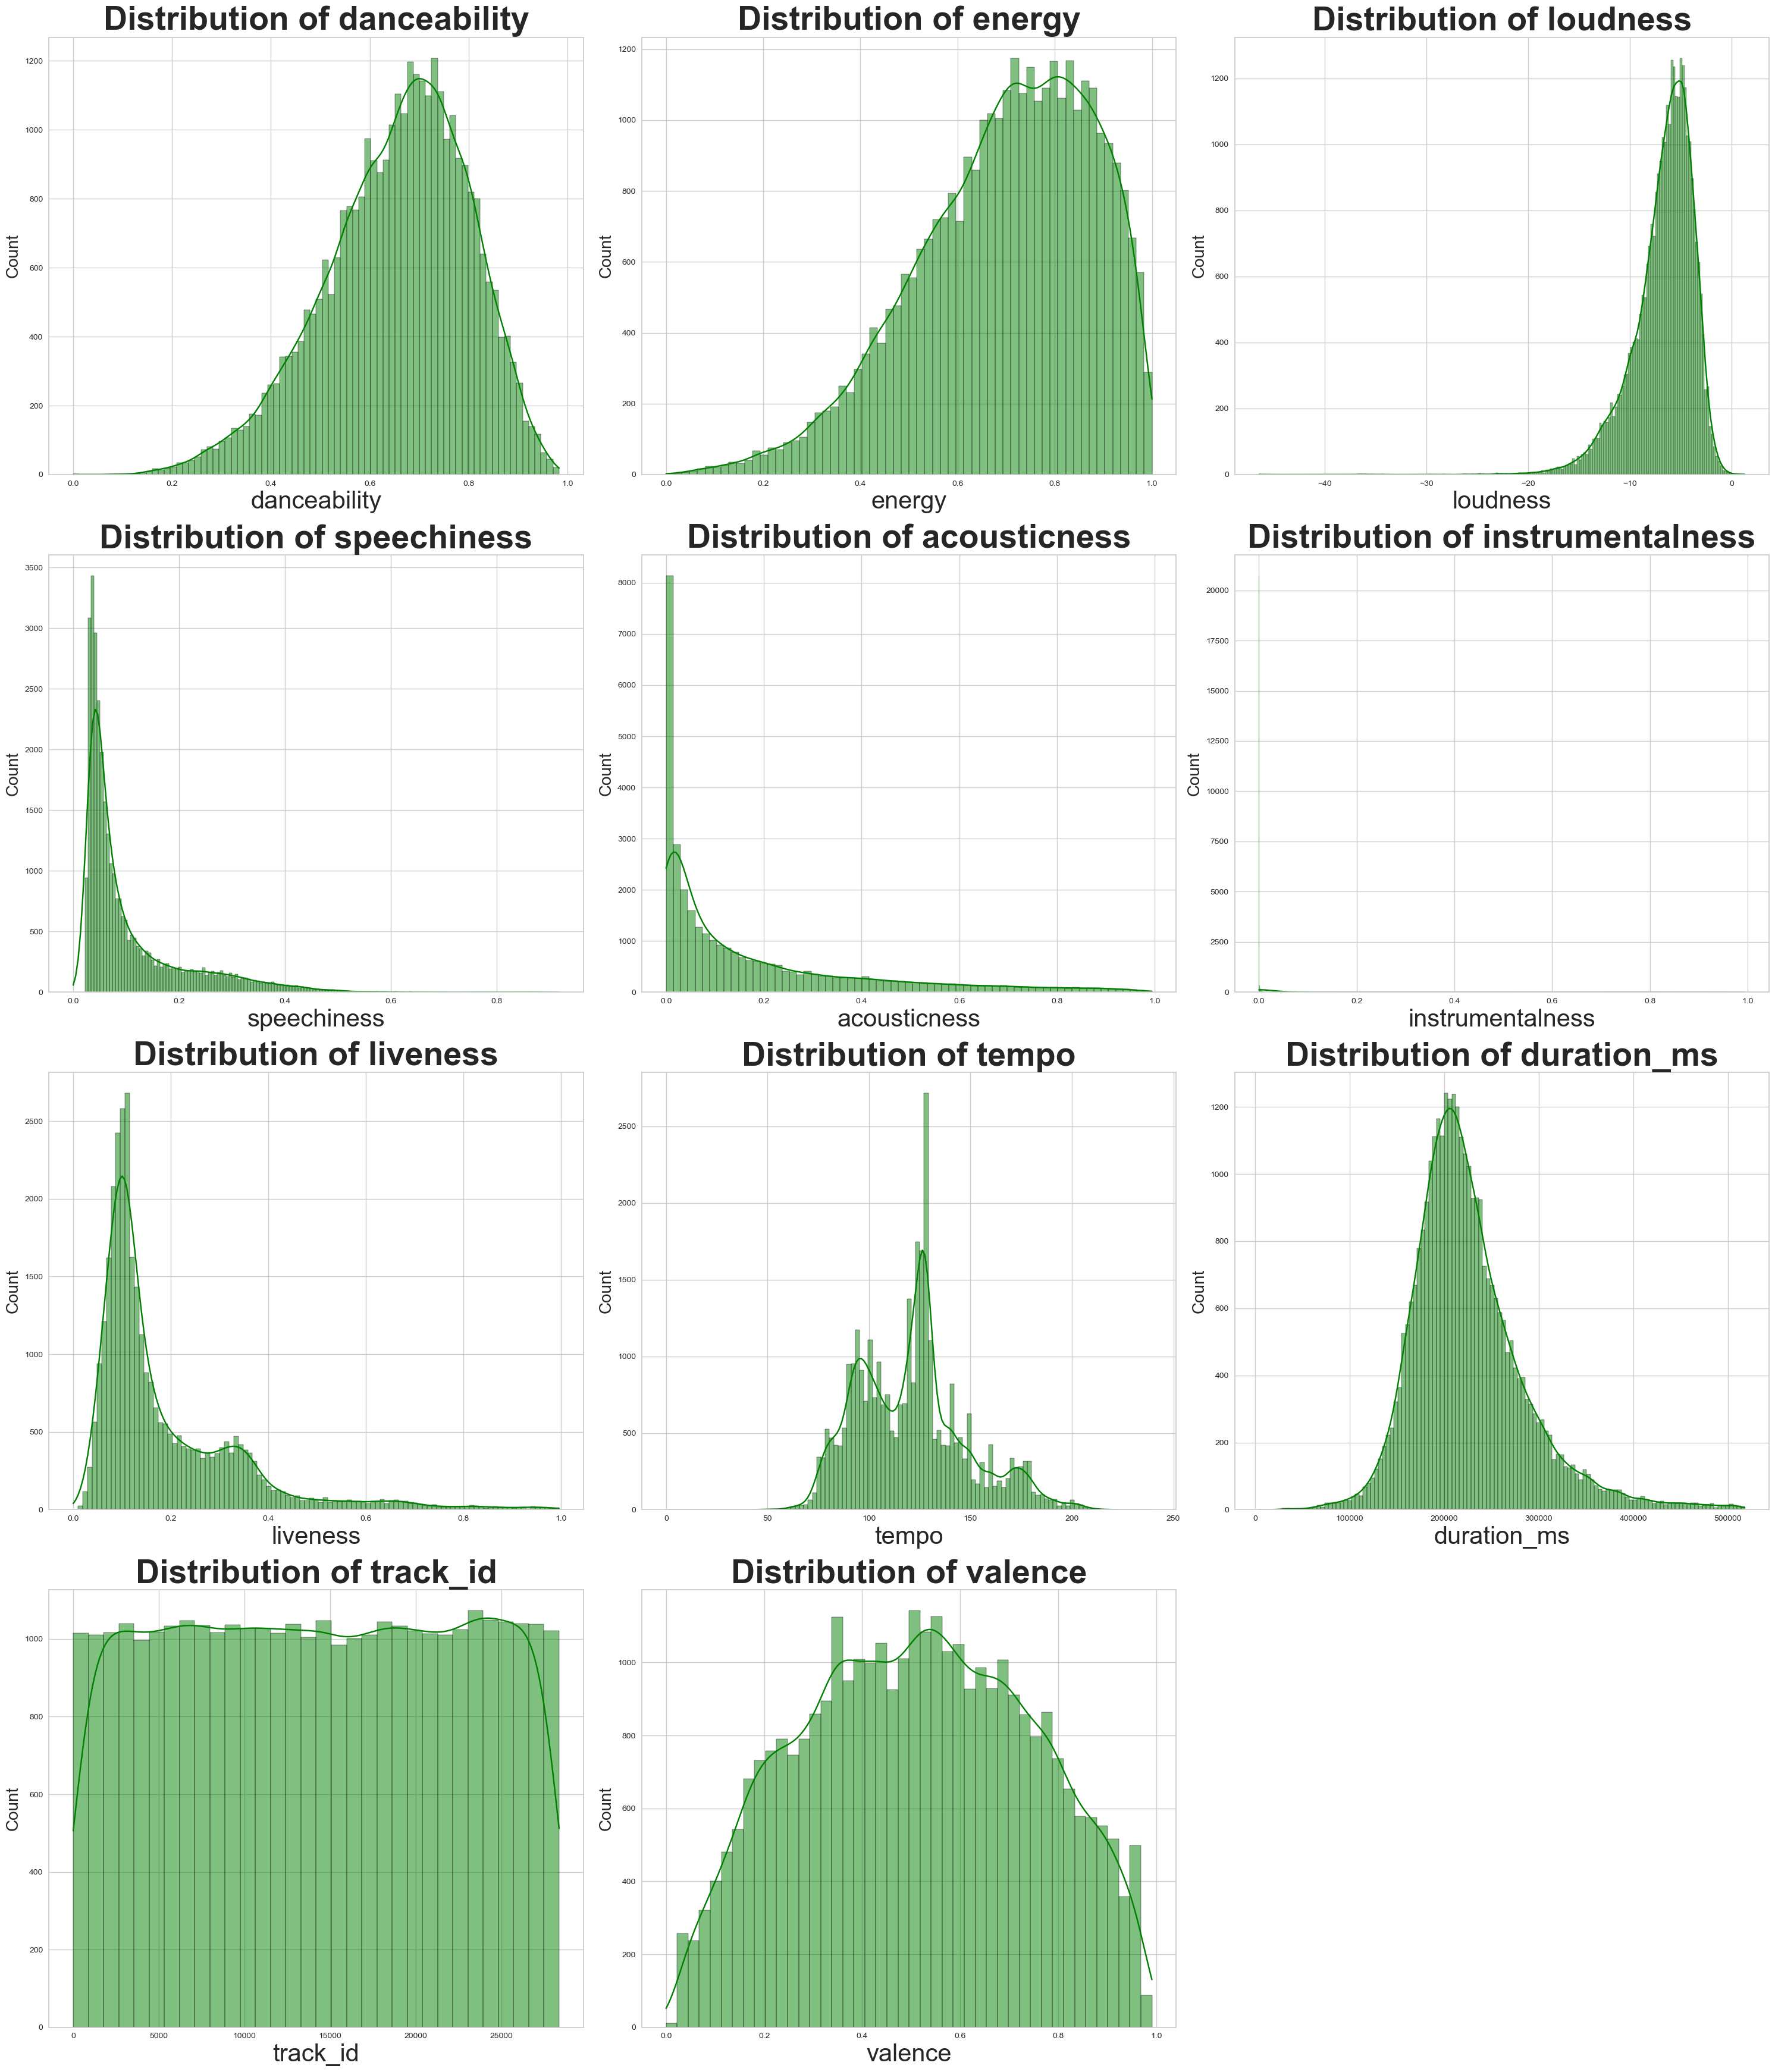

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create distribution plots for each numerical feature
plt.figure(figsize=(30, 35))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(song_data[feature], kde=True, color='green')
    
    # Set title with increased font size and bold font weight
    plt.title('Distribution of {}'.format(feature), fontweight='bold', fontsize=40)
    
    # Set x and y axis labels with increased font size
    plt.xlabel(feature, fontsize=30)
    plt.ylabel('Count', fontsize=20)
    
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()


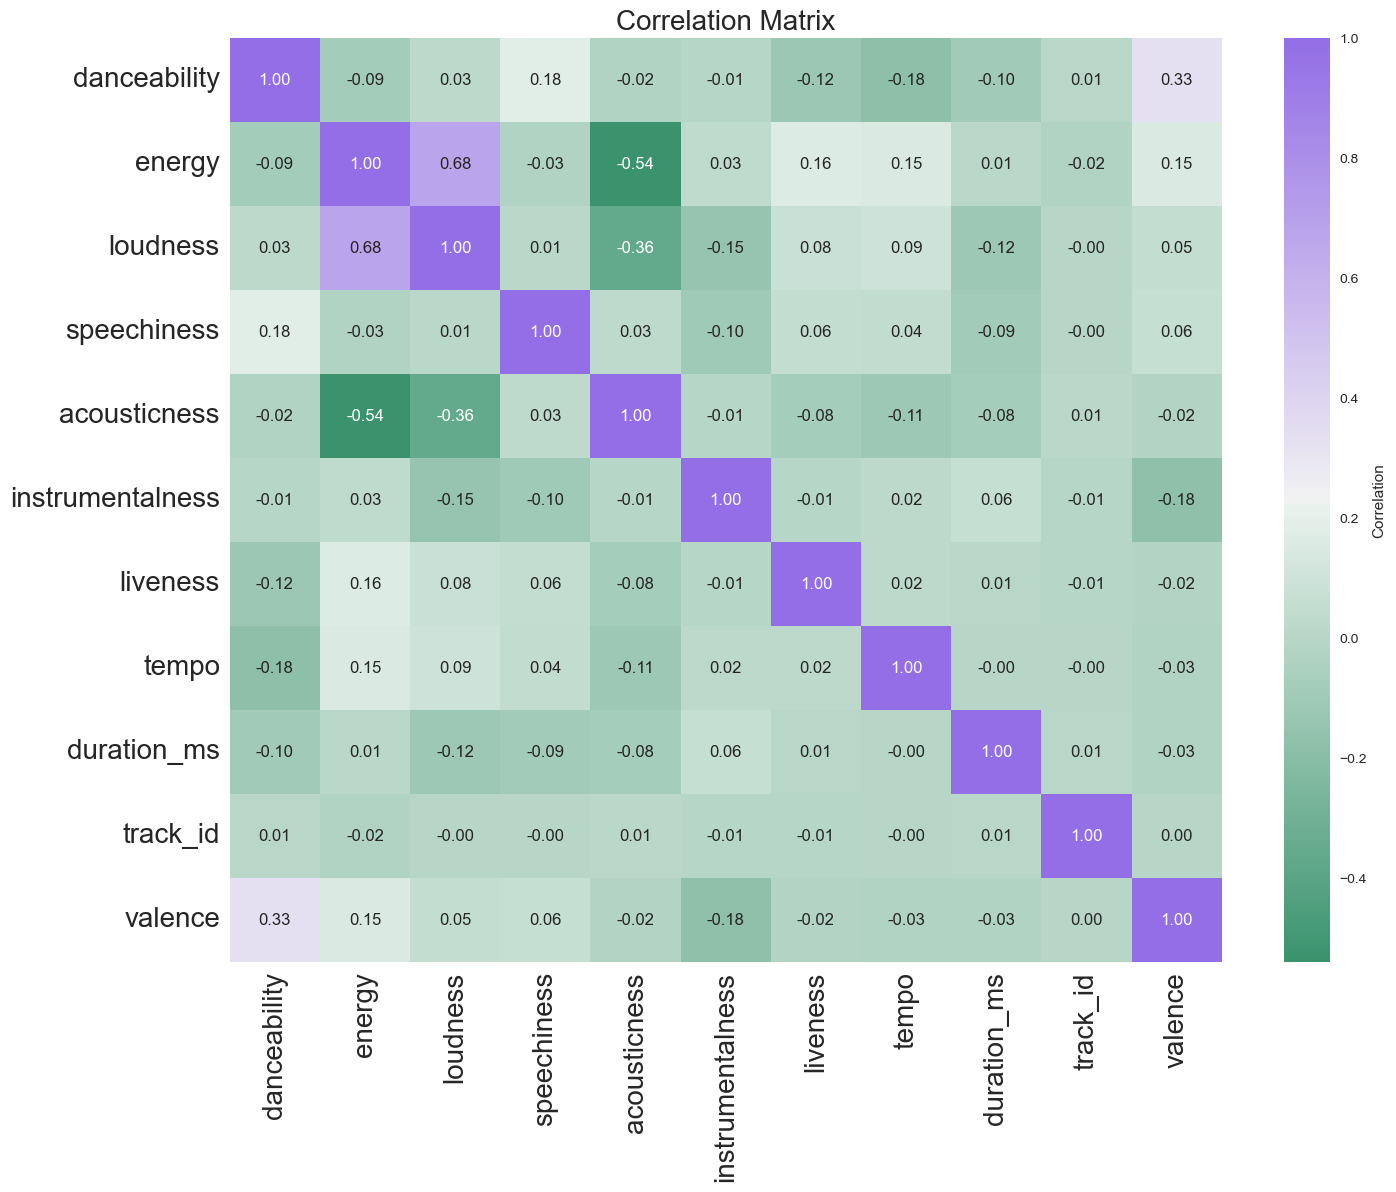

In [14]:
# Calculate correlation matrix
corr_matrix = features.corr()

# Create custom 'coolwarm' colormap leaning towards green
cmap = sns.diverging_palette(150, 275, s=80, l=55, as_cmap=True)

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, cbar_kws={'label': 'Correlation'}, fmt=".2f")
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


In [15]:
# List of features selected based on correlation analysis.

correlated_features = ['danceability', 'valence', 'energy', 'loudness', 
                        'speechiness', 'track_id', 'acousticness']

X = song_data[correlated_features].fillna(0)

In [16]:
# Ensure 'correlated_features' is defined or imported
correlated_features = ['danceability', 'valence', 'energy', 'loudness','speechiness', 'track_id','acousticness']
features_for_modeling = [feature for feature in correlated_features if feature != 'track_popularity']

X_rf = song_data[features_for_modeling]

# Creating a binary target based on 'track_popularity'
popularity_threshold = song_data['track_popularity'].quantile(0.75)
y = (song_data['track_popularity'] >= popularity_threshold).astype(int)

# Splitting the dataset(In this model, 20% of the data is used for testing (test_size=0.2) and the random state is set to 42 (random_state=42) to ensure reproducibility. )
X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42, stratify=y)

# Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = rf_model.predict(X_test)

# Calculating and printing the classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f_score, _ = score(y_test, y_pred, average='binary')

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-Score: {f_score}")


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      4877
           1       0.91      0.53      0.67      1690

    accuracy                           0.87      6567
   macro avg       0.88      0.75      0.79      6567
weighted avg       0.87      0.87      0.85      6567

Accuracy: 0.8650829907111314
Precision: 0.9102040816326531
Recall: 0.527810650887574
F-Score: 0.6681647940074906


In [17]:
# User input for song and artist
input_song_title = input("Enter the title of a song: ")
input_artist = input("Enter the artist of the song: ")

# Find the user's song in the dataset
user_song = song_data[(song_data['track_name'] == input_song_title) & (song_data['track_artist'] == input_artist)]

if not user_song.empty:
    # Predict the likelihood of liking for the dataset used in model training
    probabilities = rf_model.predict_proba(X_rf)[:, 1]
    
    # Update the main DataFrame with predicted likelihood
    song_data['predicted_likelihood'] = probabilities

    # Calculate cosine similarity for the user's song
    user_song_features = user_song[features_for_modeling].values
    similarities = cosine_similarity(user_song_features, X_rf.values).flatten()
    
    # Since we can only directly compare similarities for the user_song with the dataset,
    # we don't immediately merge 'similarities' into 'song_data'
    
    # Instead, filter and sort the DataFrame based on 'predicted_likelihood'
    # Then use the index from this operation to select corresponding similarities
    sorted_indices = np.argsort(-probabilities)  # Indices of songs sorted by decreasing likelihood
    top_similarities_indices = sorted_indices[:20]  # Assuming you want top 20 recommendations
    
    top_recommendations = song_data.iloc[top_similarities_indices]
    top_recommendations['similarity'] = similarities[top_similarities_indices]  # Assign similarities to the top recommendations
    
    print("Top 10 recommended songs based on predicted likelihood of being 'liked' and cosine similarity:")
    print(top_recommendations[['track_name', 'track_artist', 'predicted_likelihood', 'similarity']])
else:
    print("Sorry, the input song is not found in the database.")


Enter the title of a song: HIGHEST IN THE ROOM
Enter the artist of the song: Travis Scott
Top 10 recommended songs based on predicted likelihood of being 'liked' and cosine similarity:
                                            track_name      track_artist  \
28804                                           Family  The Chainsmokers   
23137                                         Suicidal         YNW Melly   
30386                                    Calma - Remix        Pedro Capó   
23772                                        Graveyard            Halsey   
12422                                  All Out of Love        Air Supply   
1391                       Electricity (with Dua Lipa)         Silk City   
541                                             Family  The Chainsmokers   
30242                                         Suicidal         YNW Melly   
23136                                          No Idea       Don Toliver   
22933                                  Blinding Lights 

/var/folders/6l/833kmrd95qs1wbnrjmr5fx_w0000gn/T/ipykernel_2182/2717171215.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_recommendations['similarity'] = similarities[top_similarities_indices]  # Assign similarities to the top recommendations
